# <center><font color = 'blue'>*ADRIS MISRA*</font></center>

**Github repository:** https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-aug20-adris-misra

# `Project - Term Deposit Sale`

### `Goal:`
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

### `Domain:` 
- Banking

### `Resources Available`
The historical data for this project is available in file
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### `Objective:`
The classification goal is to predict the likelihood of a liability customer buying personal loans.

### `Learning Outcomes:`
- Exploratory Data Analysis
- Preparing the data to train a model
- Training and making predictions using classification models
- Model evaluation

### `Attribute Information:`
##### Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account

##### Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*

##### Other attributes:
13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
15. previous: number of times the client has been contacted before for the last campaign to subscribe term deposit
16. poutcome: outcome of the previous marketing campaign

##### Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

### Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)
1. Univariate analysis (12 marks)

    a. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.
    
    b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.
    
    c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.
    
    
2. Multivariate analysis (8 marks)

    a. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.
    
    b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

### 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation

In [735]:
# Import warnings to suppress runtime warnings

import warnings
warnings.filterwarnings('ignore')

In [736]:
# Import basic libraries for data and visualization

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

In [737]:
# Import models and relevent class / functions

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.metrics import precision_recall_curve, auc, roc_curve

from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

In [738]:
# Import Graph Visualization models

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

In [739]:
# Model interpreter 

import lime
import lime.lime_tabular
from os import system

In [740]:
# Import data

cust = pd.read_csv("bank-full.csv")

In [741]:
# checking sample head data

cust.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

In [742]:
# checking sample tail data

cust.tail()

age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

      Target  
45206    yes  
45207    yes  
45208    yes  
45209     no  
45210     no

In [743]:
# shape of dataframe

cust.shape

(45211, 17)

In [744]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [745]:
# Check for Missing Values
cust.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [746]:
cust.describe().T

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

<font color='green'>**Preliminary data analysis:** 
- There are 45211 rows and 17 columns in the dataset
- There is no null or missing value in any of the columns
- There are some "Unknown" values in multiple columns that need further investigation and replaced as appropriate
- There are several categorical fields as objects that needs category conversion
- Categories other than education doesn't seem to have any explicit ordering so that needs one hot encoding
</font>

### 2. EDA: Study the data distribution in each attribute and target variable

In [747]:
# Number of unique in each column

cust.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [748]:
# Separate out numerical columns vs categorical columns

num_col = list(cust._get_numeric_data().columns)
cat_col = list(set(cust.columns) - set(num_col))

print("Numerical columns: ",num_col)
print("Categorical columns:", cat_col)

Numerical columns:  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical columns: ['loan', 'default', 'month', 'Target', 'contact', 'marital', 'housing', 'job', 'education', 'poutcome']


In [749]:
# Value counts of all categorical columns

for col in cat_col:
    print('*********',col,'***********')
    df=pd.concat([cust[col].value_counts(),cust[col].value_counts(normalize=True)*100],axis=1)
    df=df.reset_index()
    df.columns=[col,'count','frequency%']
    print(df)
    print()

********* loan ***********
  loan  count  frequency%
0   no  37967   83.977351
1  yes   7244   16.022649

********* default ***********
  default  count  frequency%
0      no  44396   98.197341
1     yes    815    1.802659

********* month ***********
   month  count  frequency%
0    may  13766   30.448342
1    jul   6895   15.250713
2    aug   6247   13.817434
3    jun   5341   11.813497
4    nov   3970    8.781049
5    apr   2932    6.485147
6    feb   2649    5.859194
7    jan   1403    3.103227
8    oct    738    1.632346
9    sep    579    1.280662
10   mar    477    1.055053
11   dec    214    0.473336

********* Target ***********
  Target  count  frequency%
0     no  39922    88.30152
1    yes   5289    11.69848

********* contact ***********
     contact  count  frequency%
0   cellular  29285   64.774059
1    unknown  13020   28.798301
2  telephone   2906    6.427639

********* marital ***********
    marital  count  frequency%
0   married  27214   60.193316
1    single  12790

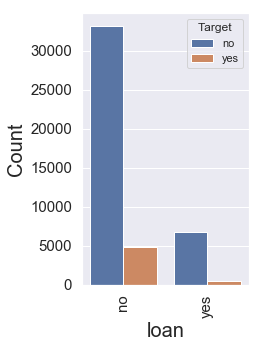

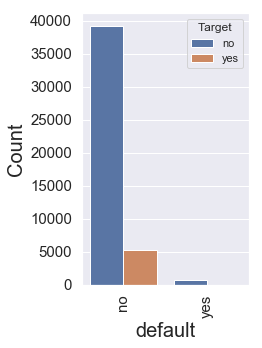

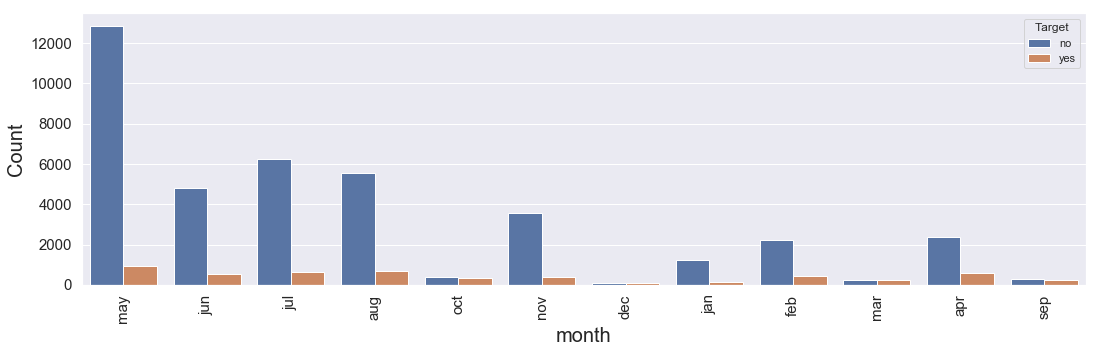

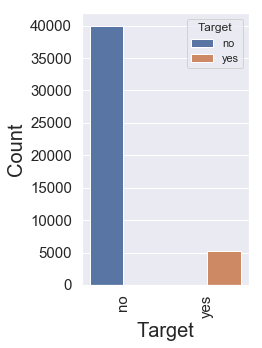

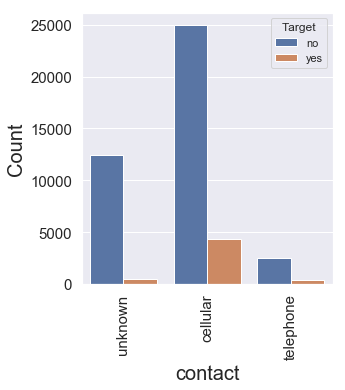

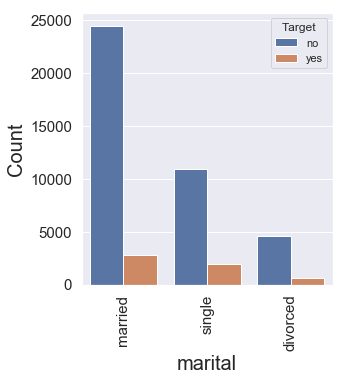

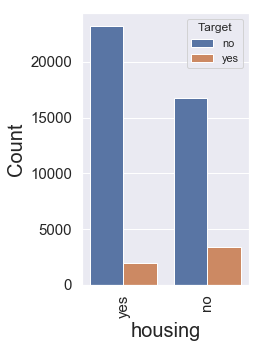

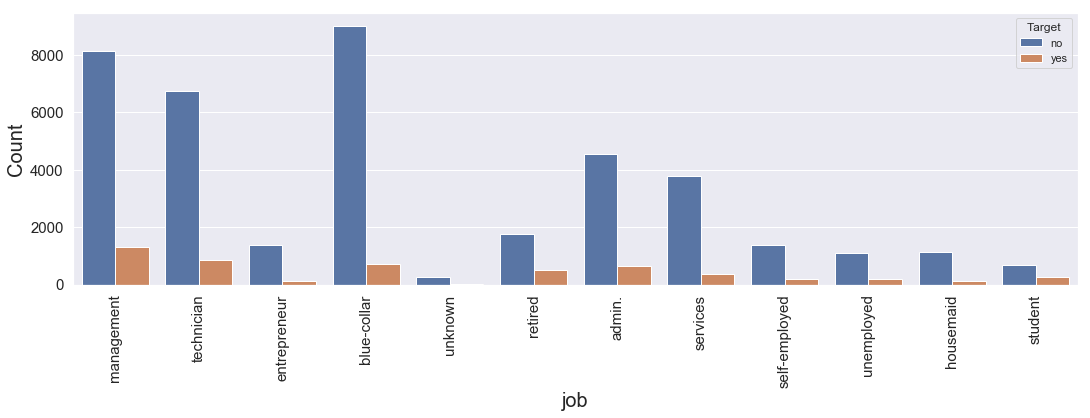

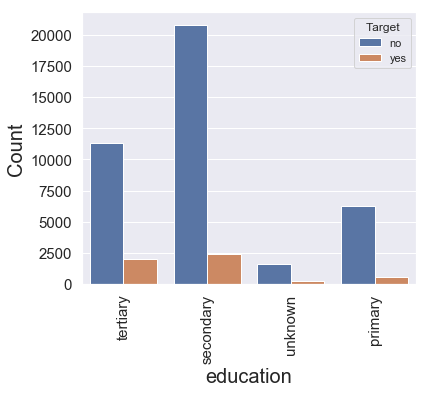

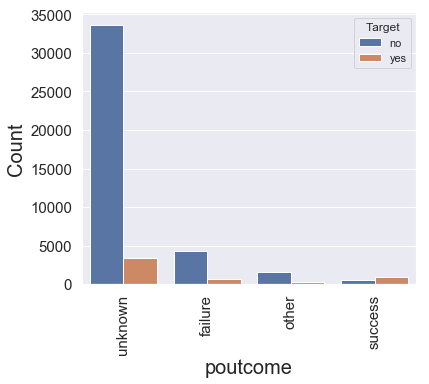

In [750]:
# categorical columns count plot

for col in cat_col:
    unq= cust[col].nunique()
    plt.figure(figsize=(unq*1.5,5));
    sns.countplot(x=cust[col], hue=cust['Target']);
    plt.xlabel(col, size=20);
    plt.ylabel('Count', size=20);
    plt.xticks(rotation=90, size=15);
    plt.yticks(size=15);
    plt.show()

In [751]:
# Check for Skew for all variables

cust.skew().sort_values(ascending=False)

previous    41.846454
balance      8.360308
campaign     4.898650
duration     3.144318
pdays        2.615715
age          0.684818
day          0.093079
dtype: float64

In [752]:
# Check for Kurt for all variables

cust.kurt().sort_values(ascending=False)

previous    4506.860660
balance      140.751547
campaign      39.249651
duration      18.153915
pdays          6.935195
age            0.319570
day           -1.059897
dtype: float64

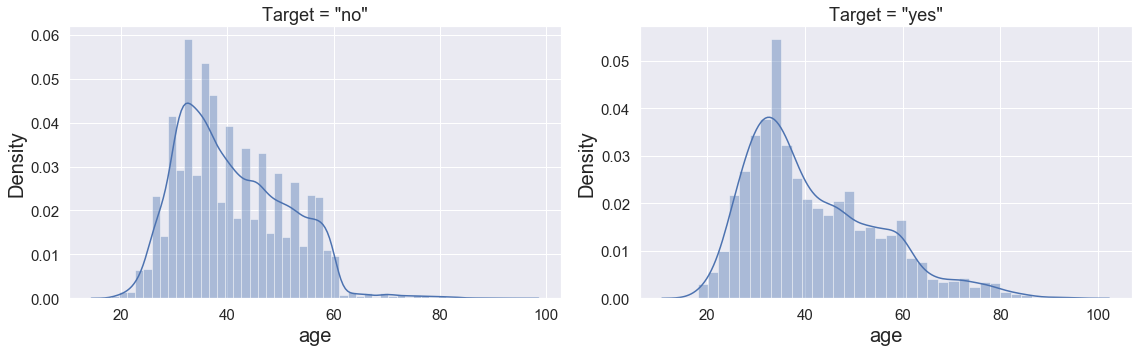

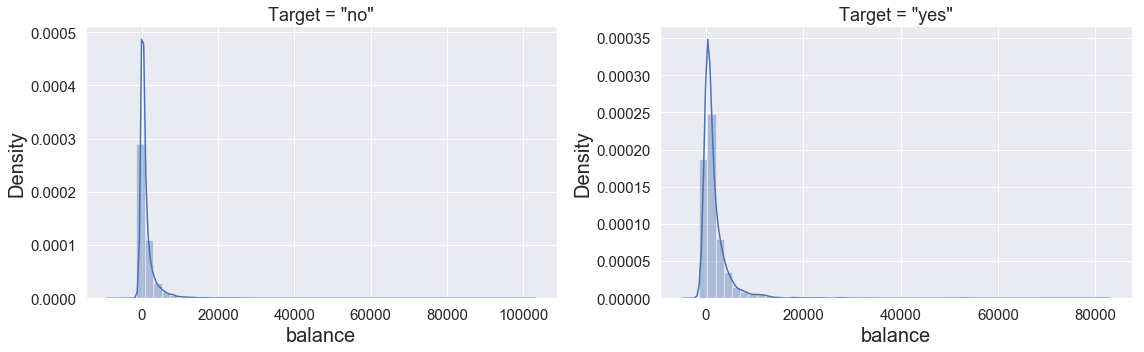

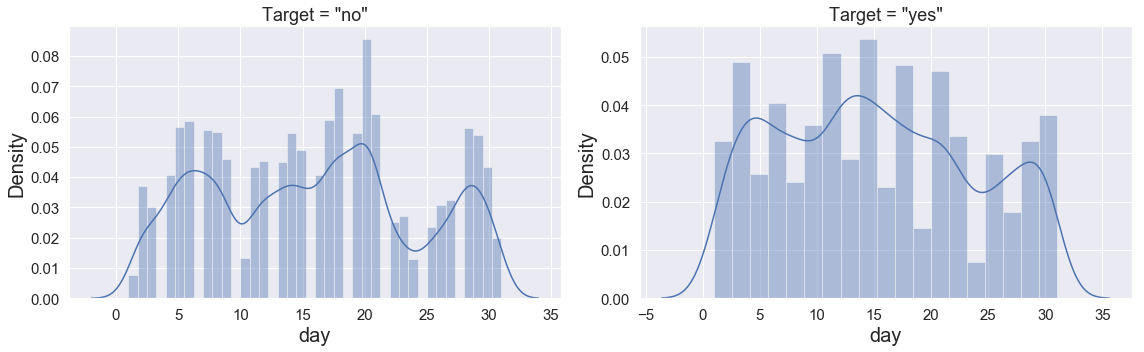

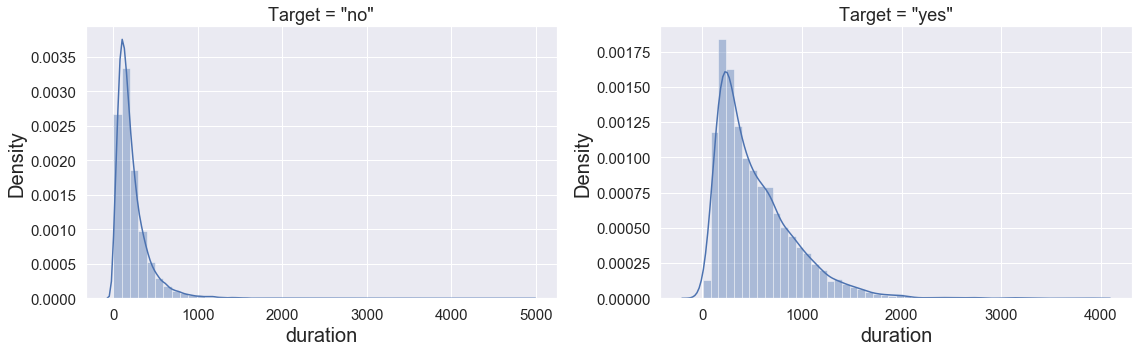

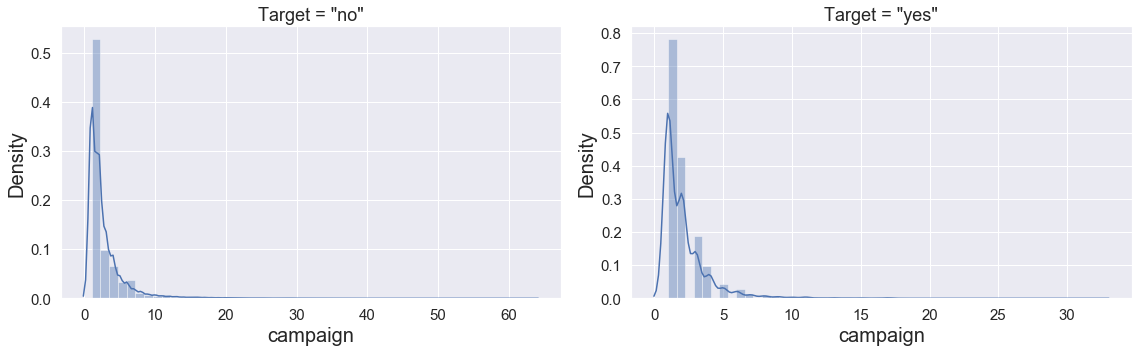

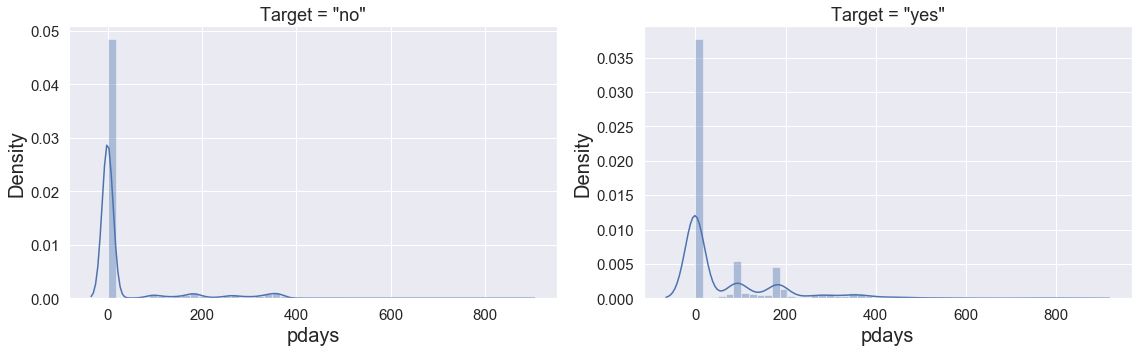

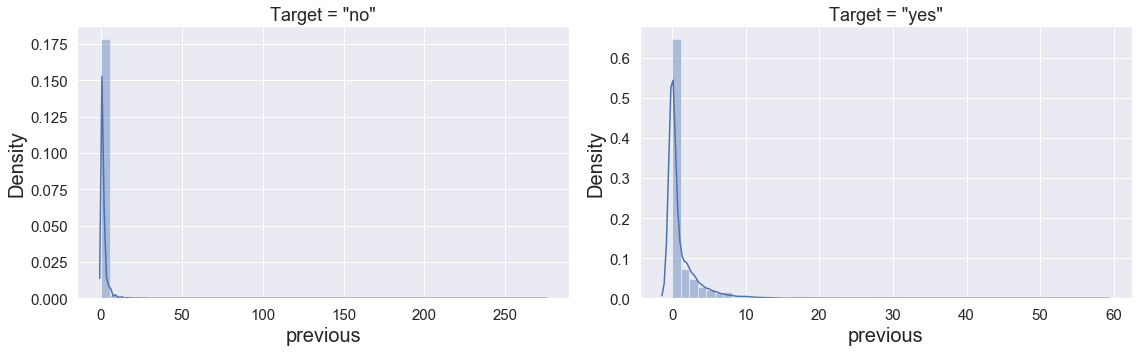

In [753]:
# continues columns plot

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
for col in num_col:
    fig, [ax1,ax2] = plt.subplots(nrows=1,ncols=2,figsize = (16,5));
    sns.distplot(x=cust[cust['Target']=="no"][col], kde=True, ax=ax1);
    ax1.set_title('Target = "no"', fontsize=18);
    ax1.set_xlabel(col, size=20);
    ax1.set_ylabel('Density', size=20);
    sns.distplot(x=cust[cust['Target']=="yes"][col], kde=True, ax=ax2);
    ax2.set_title('Target = "yes"', fontsize=18)
    ax2.set_xlabel(col, size=20);
    ax2.set_ylabel('Density', size=20);
    fig.tight_layout();
    plt.show();
plt.rcParams.update(plt.rcParamsDefault)

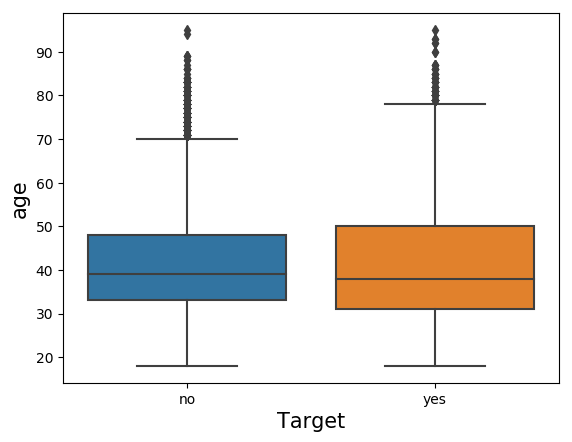

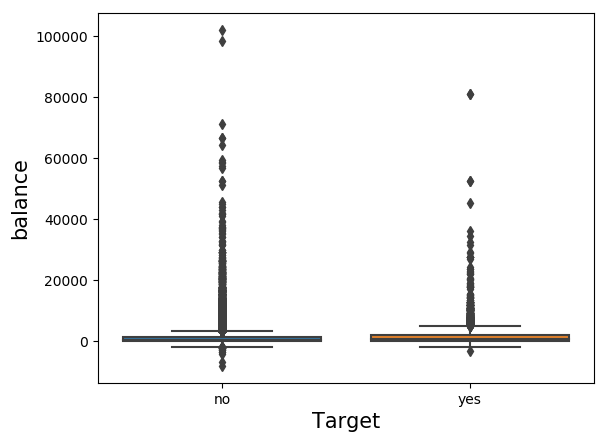

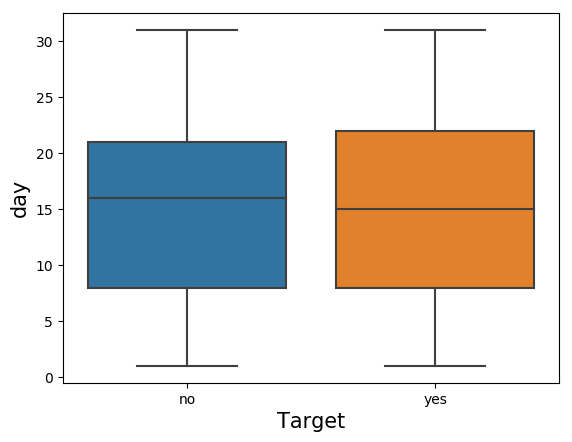

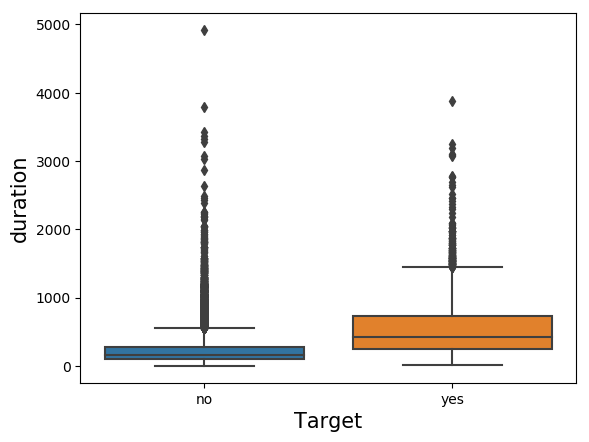

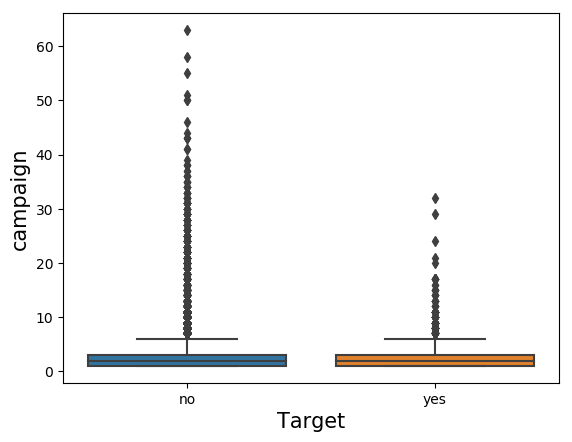

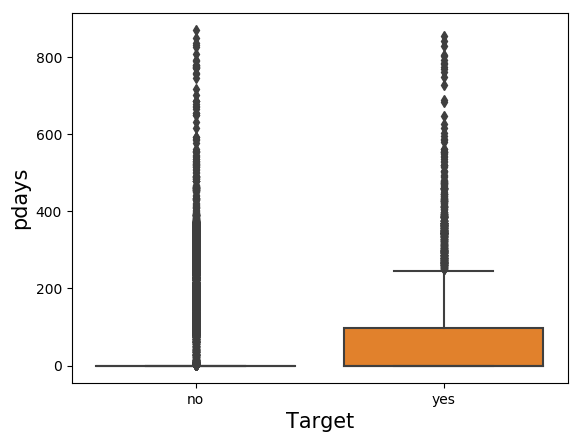

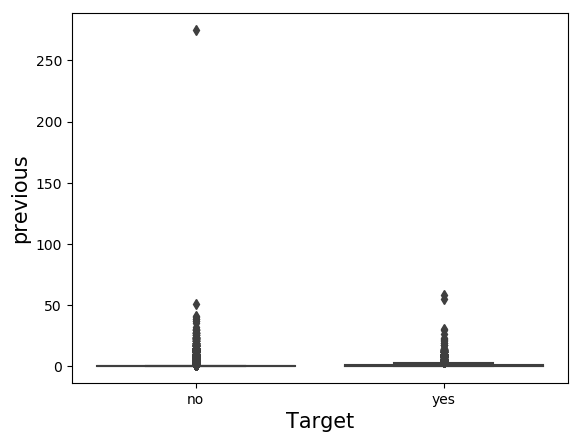

In [754]:
# Boxplot to further see outliers

for col in num_col:
    sns.boxplot(y=cust[col], x=cust['Target'])
    plt.xlabel('Target', size=15);
    plt.ylabel(col, size=15);
    plt.show()

<font color='green'>**Observation:**
- Target value "yes" only having 11% of the values it is somewhat imbalanced
- poutcome and month also doesn't have balanced distribution
- previous, balance, campaign, duration are highly Leptokurtic
- There are lot of outliers in previous, balance, campaign, duration, pdays
</font>

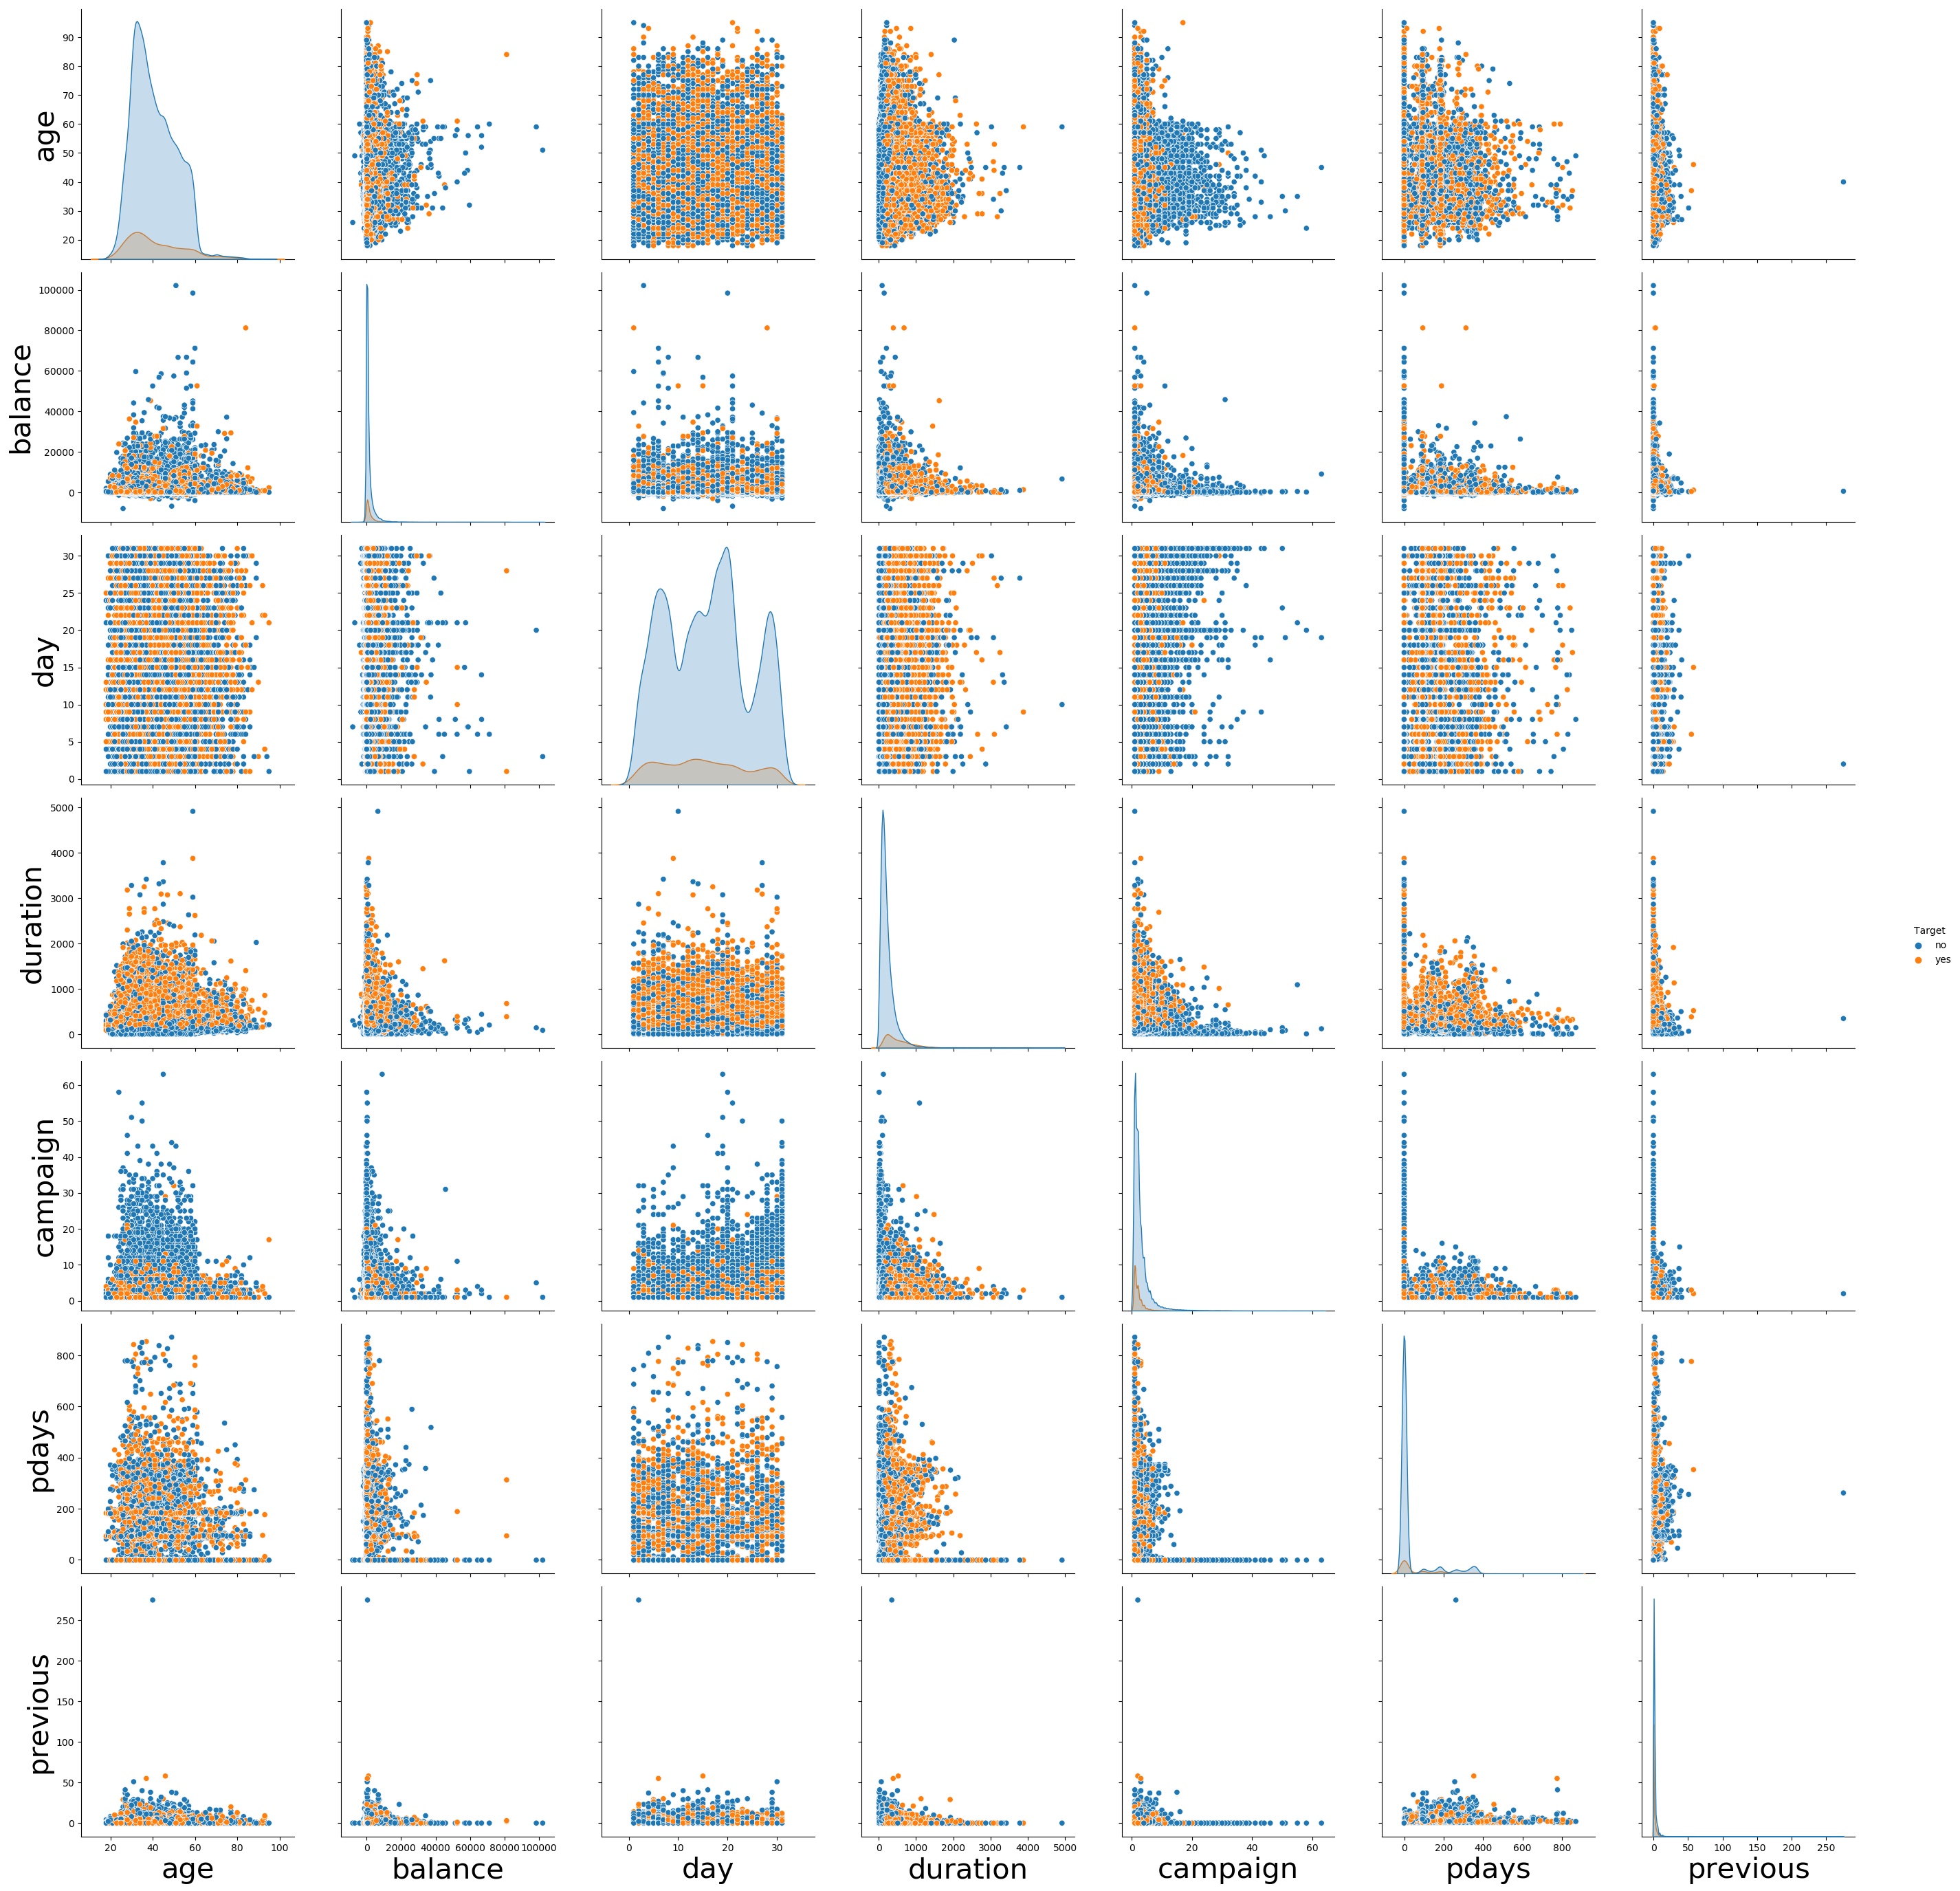

In [755]:
# pairplot

sns.set_context(rc={"axes.labelsize":30})
sns.pairplot(cust, hue='Target',diag_kind ='kde', height = 4);

plt.rcParams.update(plt.rcParamsDefault)

<font color='green'>**Observation:**
- There doesn't seem to have much correlation between numerical data
</font>

In [756]:
# day vs month pivot for Target=yes

pd.pivot_table(data=cust[cust['Target']=='yes'], index='day', columns='month', values='Target', aggfunc='count')

month    apr   aug   dec   feb   jan   jul   jun   mar   may   nov   oct   sep
day                                                                           
1       13.0   NaN   NaN   3.0   NaN  10.0  39.0   NaN   NaN   NaN   6.0  19.0
2        6.0   6.0   4.0  38.0   NaN  25.0  59.0  25.0   NaN   5.0   2.0  12.0
3        5.0  12.0   8.0  42.0   NaN  15.0  49.0  20.0   NaN  16.0   NaN  11.0
4        NaN  38.0   8.0  45.0   NaN   4.0  48.0   8.0  66.0   3.0   NaN  10.0
5       12.0  55.0   NaN  33.0   NaN   2.0  55.0  21.0  32.0   5.0   NaN   NaN
6       15.0  46.0   NaN  16.0   NaN   8.0  17.0   5.0  43.0   6.0  14.0  11.0
7        6.0  41.0   7.0   NaN   1.0  38.0   1.0   NaN  44.0   NaN   4.0  15.0
8       28.0  21.0   NaN  10.0   2.0  44.0  12.0   8.0  34.0   6.0  12.0  24.0
9       13.0   2.0  11.0  27.0   NaN  25.0  26.0  18.0  12.0  17.0   2.0  26.0
10       NaN  26.0   8.0  22.0   NaN  25.0   NaN  13.0   1.0  19.0   NaN   7.0
11       NaN  52.0   2.0  30.0   7.0  12.0  13.0  10.0  19.0  17.0   7.0  12.0
12       6.0  73.0   NaN  21.0  13.0   8.0  15.0  14.0  59.0  25.0  10.0   NaN
13      22.0  56.0   NaN  10.0   9.0  15.0   1.0   2.0  85.0  23.0  15.0   3.0
14      25.0  37.0   2.0   NaN  13.0  22.0  13.0   NaN  72.0   6.0   8.0  12.0
15      27.0   NaN   4.0  16.0   7.0  33.0  27.0   7.0  84.0   1.0   9.0  23.0
16      30.0   4.0   4.0   9.0   NaN  33.0  22.0   8.0  22.0  26.0  14.0  20.0
17      37.0   9.0   6.0  20.0   NaN  21.0  20.0   9.0   6.0  36.0   5.0   7.0
18       NaN  31.0   4.0  25.0   6.0  27.0  23.0  14.0  62.0  24.0   8.0   4.0
19       4.0  21.0   NaN  10.0   NaN   9.0  18.0   2.0  12.0  36.0  10.0   NaN
20      52.0  25.0   NaN   NaN   NaN   5.0  25.0   NaN  18.0  51.0  15.0   1.0
21      27.0  27.0   7.0   NaN   NaN  25.0   1.0   NaN  24.0  63.0  27.0   NaN
22      25.0  15.0   5.0   4.0   NaN  24.0   8.0   7.0  23.0   NaN  29.0  14.0
23      22.0   NaN   1.0  12.0   NaN  29.0   9.0   8.0  12.0   NaN  20.0  13.0
24       6.0   3.0   2.0   8.0   NaN  18.0   4.0   5.0   6.0   1.0   3.0   6.0
25       NaN  20.0   NaN   8.0   6.0  23.0   5.0   9.0  38.0  13.0   9.0   2.0
26       8.0  17.0   NaN  15.0   3.0   7.0   3.0   6.0  48.0   NaN   9.0   NaN
27      14.0  19.0   NaN  17.0  11.0   6.0   2.0  12.0  37.0   2.0  27.0   3.0
28       6.0  15.0   9.0   NaN  31.0  33.0  11.0   NaN  22.0   NaN  11.0   5.0
29      16.0   2.0   7.0   NaN  21.0  24.0   9.0   2.0  16.0   NaN  26.0   6.0
30     152.0   NaN   1.0   NaN  12.0  36.0  11.0   9.0  27.0   2.0  18.0   3.0
31       NaN  15.0   NaN   NaN   NaN  21.0   NaN   6.0   1.0   NaN   3.0   NaN

In [757]:
# day vs month pivot for Target=yes

pd.pivot_table(data=cust[cust['Target']=='no'], index='day', columns='month', values='Target', aggfunc='count')

month    apr    aug   dec    feb    jan    jul    jun   mar     may    nov  \
day                                                                          
1       34.0    1.0   NaN    6.0    NaN   63.0   67.0   2.0     NaN    NaN   
2       44.0   19.0   1.0  479.0    NaN   49.0  452.0  23.0     NaN   26.0   
3       57.0    4.0   5.0  302.0    NaN   86.0  408.0   9.0     NaN    6.0   
4        NaN  192.0  10.0  418.0    NaN   87.0  283.0   7.0   175.0   17.0   
5        7.0  189.0   2.0  409.0    NaN    5.0  375.0  22.0   672.0    9.0   
6       57.0  259.0   NaN  225.0    2.0   10.0  381.0   1.0   777.0    6.0   
7       78.0  312.0  19.0    NaN    3.0  351.0    4.0   NaN   847.0    NaN   
8       82.0  307.0   1.0   12.0    3.0  356.0   17.0   6.0   807.0   12.0   
9       73.0   11.0   9.0  185.0    NaN  324.0  321.0   4.0   417.0   19.0   
10       NaN   42.0   6.0   17.0    NaN  292.0    1.0  14.0     5.0   17.0   
11       NaN  358.0   2.0   17.0    5.0  197.0  216.0  13.0   450.0   12.0   
12      17.0  342.0   1.0    9.0    9.0   12.0  194.0   7.0   734.0   15.0   
13      56.0  297.0   1.0    9.0    9.0    8.0    NaN   2.0   917.0   16.0   
14      68.0  285.0   7.0    NaN   10.0  279.0    8.0   NaN   939.0    1.0   
15      81.0    NaN   2.0    6.0    7.0  235.0   42.0  11.0  1042.0    3.0   
16     254.0    6.0   2.0    6.0    NaN  222.0  296.0  14.0   369.0   29.0   
17     556.0   25.0   8.0    9.0    NaN  267.0  335.0  10.0     7.0  539.0   
18       NaN  271.0   5.0   11.0    9.0  232.0  270.0   7.0   575.0  685.0   
19       5.0  326.0   NaN    8.0    NaN    1.0  278.0   1.0   330.0  658.0   
20     582.0  286.0   NaN    NaN    NaN   10.0  583.0   1.0   375.0  700.0   
21      15.0  248.0   6.0    1.0    NaN  349.0    NaN   NaN   424.0  762.0   
22      25.0  321.0   2.0   11.0    1.0  303.0   17.0   2.0    51.0    1.0   
23      19.0    1.0   2.0    6.0    NaN  313.0   23.0   5.0   423.0    NaN   
24       9.0   14.0   5.0   15.0    NaN  290.0   30.0   7.0     3.0    7.0   
25       NaN  273.0   NaN    7.0   12.0  278.0   36.0   6.0    63.0   11.0   
26      11.0  261.0   NaN   21.0    8.0   12.0   43.0  17.0   527.0    NaN   
27      25.0  263.0   1.0   19.0   11.0   11.0   50.0  10.0   545.0    5.0   
28      13.0  367.0   7.0    NaN  403.0  348.0    7.0   NaN   521.0    NaN   
29      14.0  256.0   6.0    NaN  533.0  346.0    9.0   5.0   426.0    NaN   
30     173.0    1.0   3.0    NaN  236.0  373.0   49.0  15.0   414.0   11.0   
31       NaN   22.0   1.0    NaN    NaN  559.0    NaN   8.0     6.0    NaN   

month   oct   sep  
day                
1      27.0  32.0  
2       6.0  12.0  
3       NaN  24.0  
4       6.0  20.0  
5       3.0   2.0  
6      16.0  17.0  
7      18.0  28.0  
8      21.0  17.0  
9       1.0  18.0  
10      2.0   7.0  
11     16.0  12.0  
12     19.0   NaN  
13     23.0   6.0  
14     28.0  13.0  
15     27.0   9.0  
16     13.0  12.0  
17      3.0   4.0  
18     12.0   3.0  
19     28.0   NaN  
20     19.0   4.0  
21     17.0   3.0  
22     12.0   5.0  
23      5.0  16.0  
24      NaN   5.0  
25      8.0  13.0  
26     18.0   1.0  
27     24.0   7.0  
28     16.0   5.0  
29     13.0   8.0  
30     13.0   7.0  
31      1.0   NaN

<font color='green'>**Observation:**
- Month, Day distribution of data seems very random
</font>

In [758]:
cust_encoded = cust.copy()

for col in ['default','housing','loan','Target']:
    cust_encoded[col] = cust_encoded[col].map(dict(yes=1, no=0))

In [759]:
cust_encoded

age           job   marital  education  default  balance  housing  \
0       58    management   married   tertiary        0     2143        1   
1       44    technician    single  secondary        0       29        1   
2       33  entrepreneur   married  secondary        0        2        1   
3       47   blue-collar   married    unknown        0     1506        1   
4       33       unknown    single    unknown        0        1        0   
...    ...           ...       ...        ...      ...      ...      ...   
45206   51    technician   married   tertiary        0      825        0   
45207   71       retired  divorced    primary        0     1729        0   
45208   72       retired   married  secondary        0     5715        0   
45209   57   blue-collar   married  secondary        0      668        0   
45210   37  entrepreneur   married  secondary        0     2971        0   

       loan    contact  day month  duration  campaign  pdays  previous  \
0         0    unknown    5   may       261         1     -1         0   
1         0    unknown    5   may       151         1     -1         0   
2         1    unknown    5   may        76         1     -1         0   
3         0    unknown    5   may        92         1     -1         0   
4         0    unknown    5   may       198         1     -1         0   
...     ...        ...  ...   ...       ...       ...    ...       ...   
45206     0   cellular   17   nov       977         3     -1         0   
45207     0   cellular   17   nov       456         2     -1         0   
45208     0   cellular   17   nov      1127         5    184         3   
45209     0  telephone   17   nov       508         4     -1         0   
45210     0   cellular   17   nov       361         2    188        11   

      poutcome  Target  
0      unknown       0  
1      unknown       0  
2      unknown       0  
3      unknown       0  
4      unknown       0  
...        ...     ...  
45206  unknown       1  
45207  unknown       1  
45208  success       1  
45209  unknown       0  
45210    other       0  

[45211 rows x 17 columns]

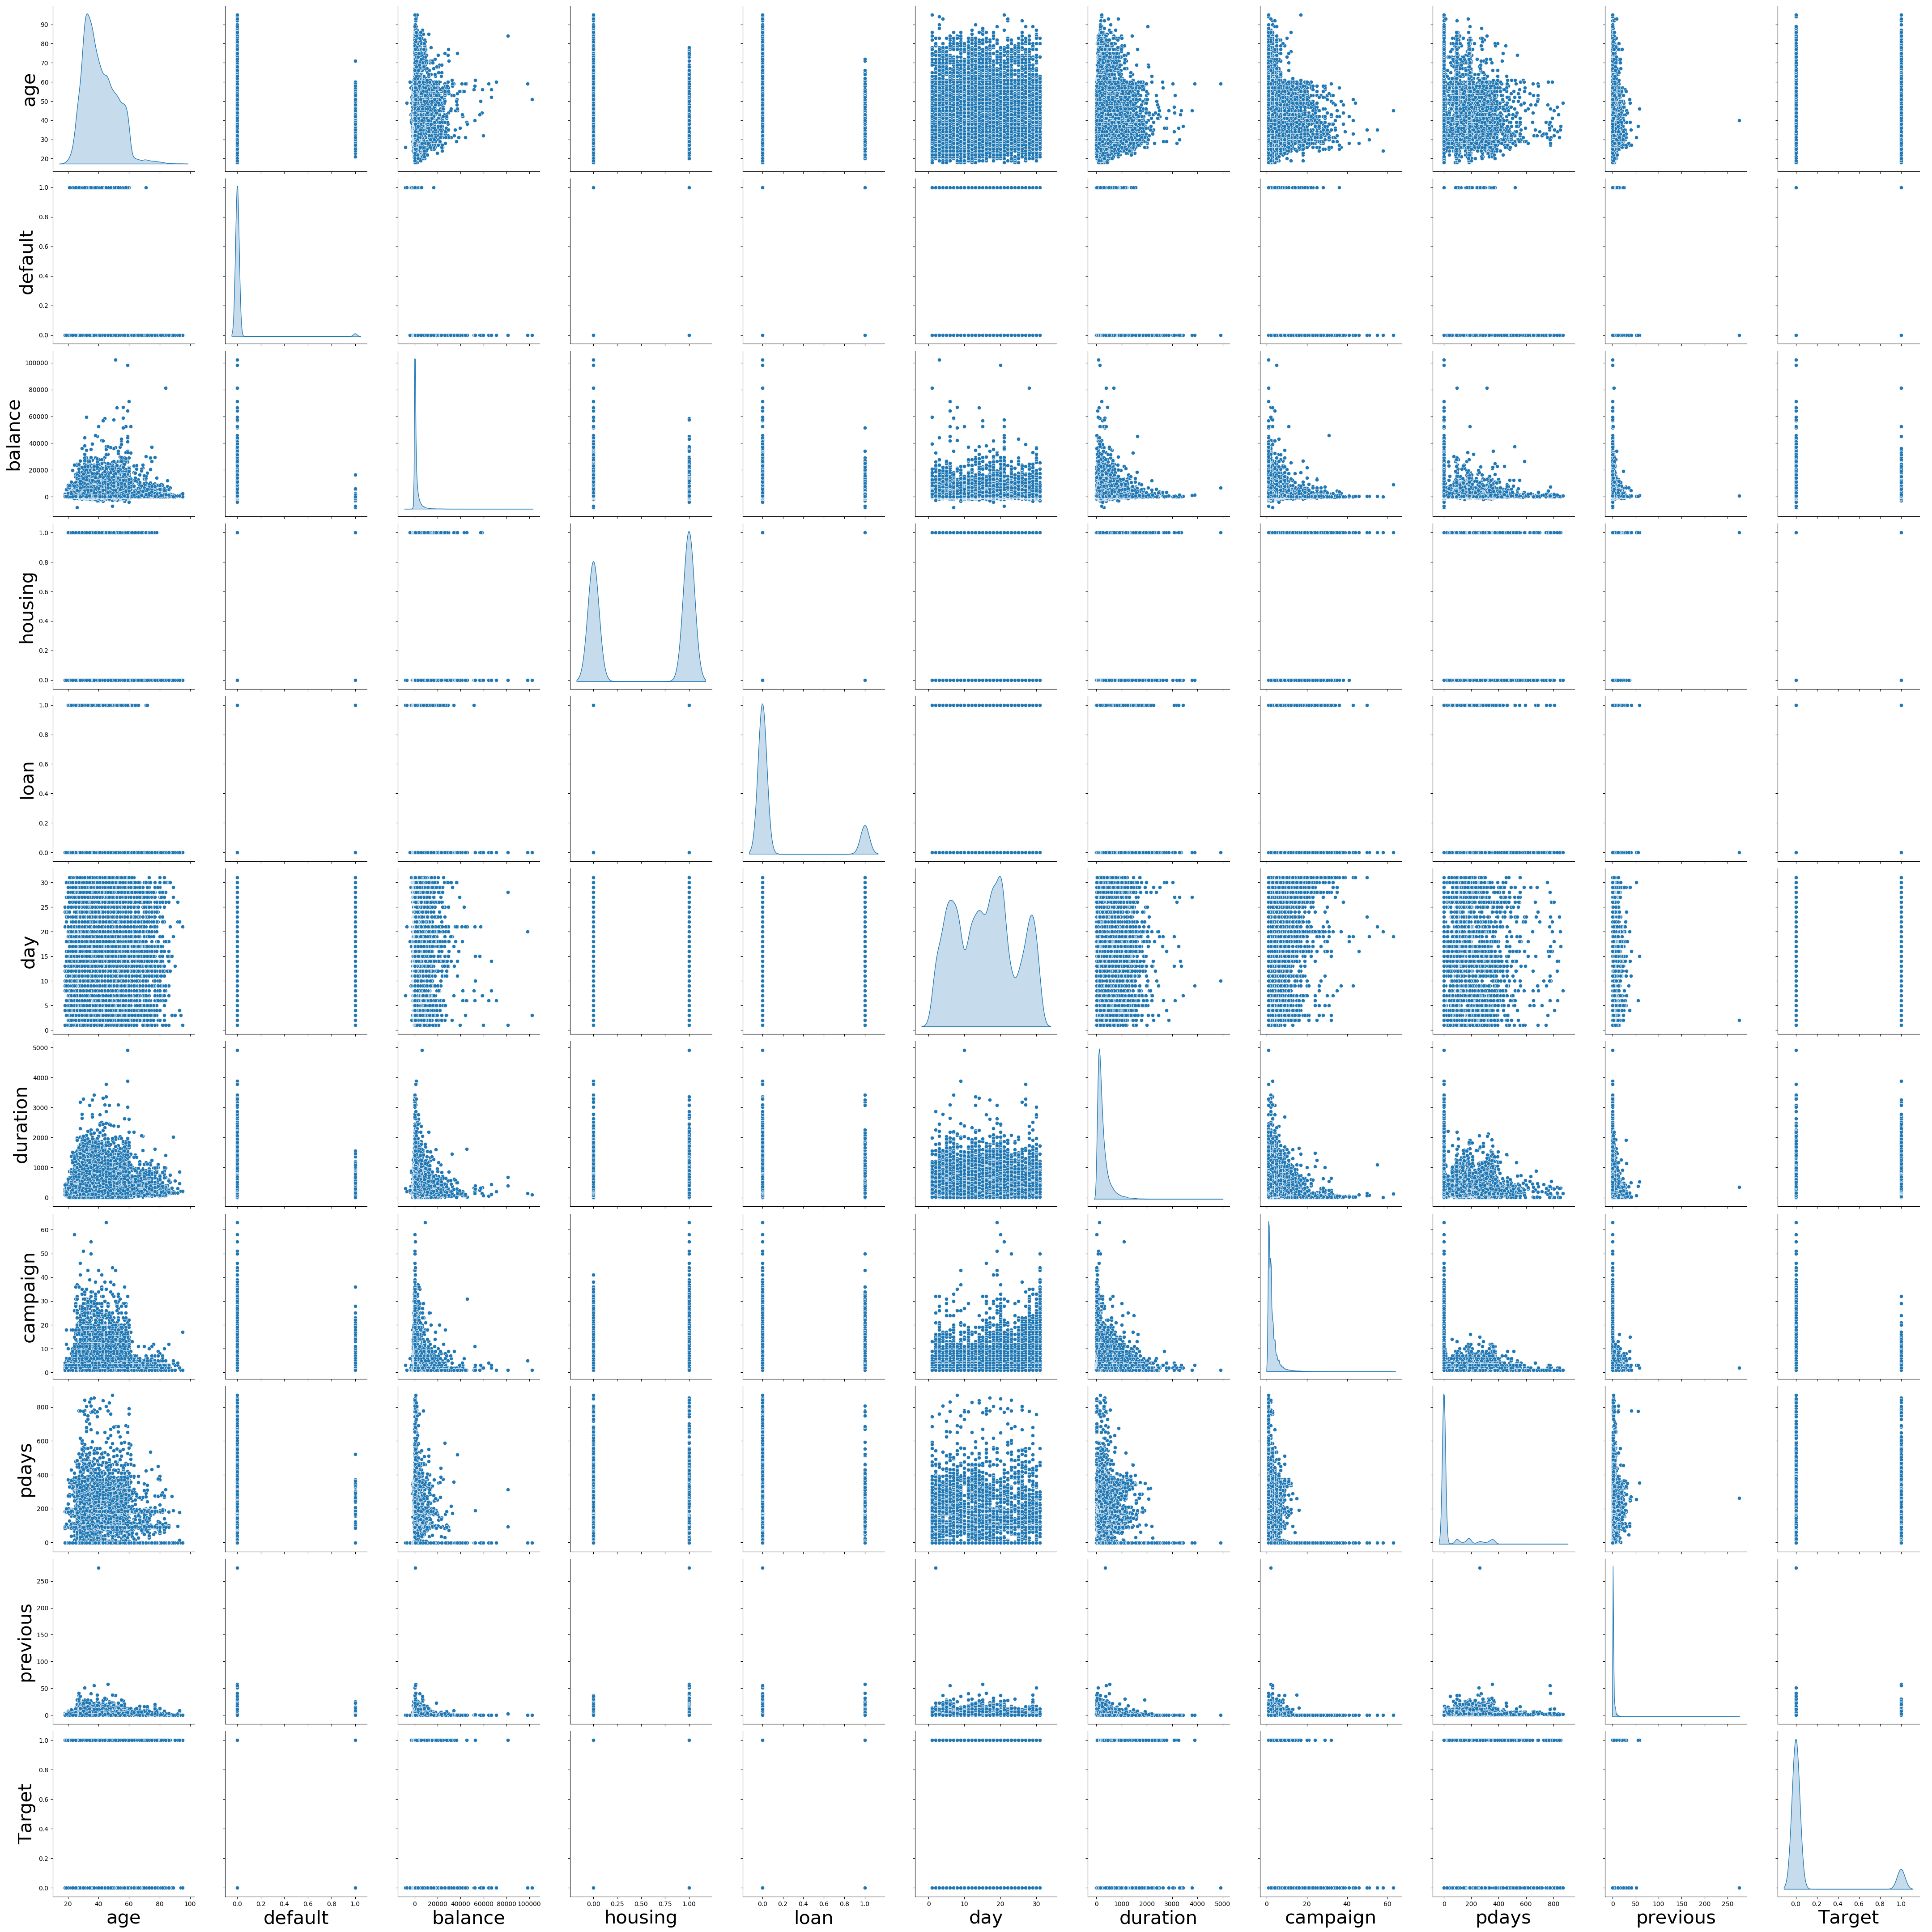

In [760]:
# pairplot

sns.set_context(rc={"axes.labelsize":30})
sns.pairplot(cust_encoded, diag_kind ='kde', height = 4);

plt.rcParams.update(plt.rcParamsDefault)

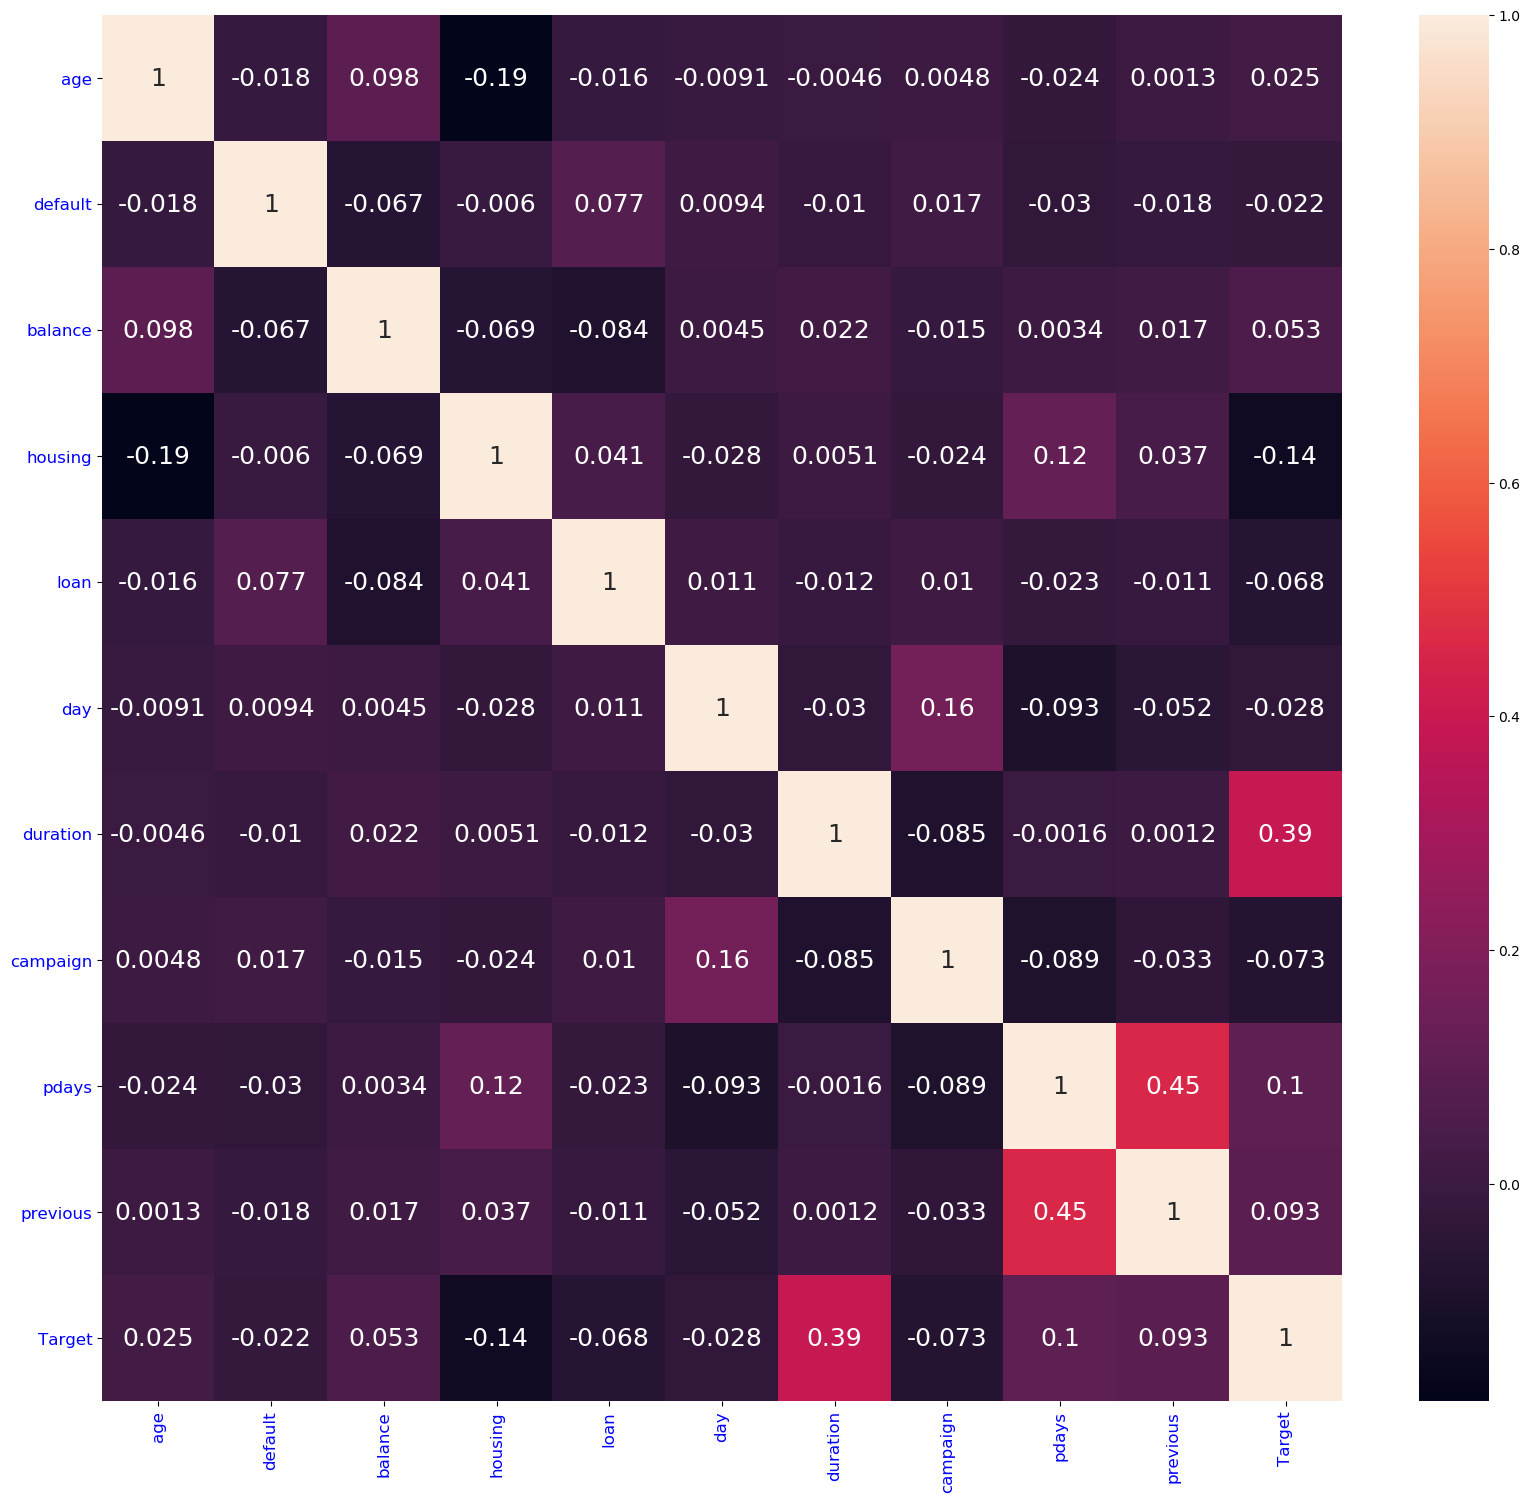

In [761]:
# correlation matrix

plt.figure(figsize=(20,18))
sns.heatmap(cust_encoded.corr(), annot=True, annot_kws={"size":18});
plt.xticks(rotation=90, size=12, color='blue');
plt.yticks(rotation=0, size=12, color='blue');

<font color='green'>**Observation:**
- There are lot of outlier and few attributes are highly leptokurtic so some feature standardization might be needed. If needed that will be done based on initial performance of the model.
- In this section our primary algorith will be tree based. Tree based algorithm is not much sensitive to distribution and outliers, so standardization might not be needed.
- Though we expect the logistics model to perform poorly with data being so much skewed and leptokurtic.
</font>

### Deliverable – 2 (Prepare the data for analytics) – (10)
1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratio of 70:30

In [762]:
cust_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 5.9+ MB


In [763]:
# Convert the columns with an 'object' datatype into categorical variables

for col in cust_encoded.columns: # Loop through all columns in the dataframe
    if cust_encoded[col].dtype == 'object': # Only apply for columns with categorical strings
        cust_encoded[col] = pd.Categorical(cust_encoded[col])# Replace strings with an integer

In [764]:
# checking sample head data

cust_encoded.head(10)

age           job   marital  education  default  balance  housing  loan  \
0   58    management   married   tertiary        0     2143        1     0   
1   44    technician    single  secondary        0       29        1     0   
2   33  entrepreneur   married  secondary        0        2        1     1   
3   47   blue-collar   married    unknown        0     1506        1     0   
4   33       unknown    single    unknown        0        1        0     0   
5   35    management   married   tertiary        0      231        1     0   
6   28    management    single   tertiary        0      447        1     1   
7   42  entrepreneur  divorced   tertiary        1        2        1     0   
8   58       retired   married    primary        0      121        1     0   
9   43    technician    single  secondary        0      593        1     0   

   contact  day month  duration  campaign  pdays  previous poutcome  Target  
0  unknown    5   may       261         1     -1         0  unknown       0  
1  unknown    5   may       151         1     -1         0  unknown       0  
2  unknown    5   may        76         1     -1         0  unknown       0  
3  unknown    5   may        92         1     -1         0  unknown       0  
4  unknown    5   may       198         1     -1         0  unknown       0  
5  unknown    5   may       139         1     -1         0  unknown       0  
6  unknown    5   may       217         1     -1         0  unknown       0  
7  unknown    5   may       380         1     -1         0  unknown       0  
8  unknown    5   may        50         1     -1         0  unknown       0  
9  unknown    5   may        55         1     -1         0  unknown       0

In [765]:
cust_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  int64   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int64   
 7   loan       45211 non-null  int64   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  int64   
dtypes: category(6), int64(11)
memory usage: 4.1 MB


In [766]:
# Defining independent and dependent variable

X = cust_encoded.drop(['Target'],axis=1)
y = cust_encoded['Target']

In [767]:
# convert categorical variables to dummy variables

X = pd.get_dummies(X)

In [768]:
X.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [769]:
X.T

0      1      2      3      4      5      6      7      \
age                     58     44     33     47     33     35     28     42   
default                  0      0      0      0      0      0      0      1   
balance               2143     29      2   1506      1    231    447      2   
housing                  1      1      1      1      0      1      1      1   
loan                     0      0      1      0      0      0      1      0   
day                      5      5      5      5      5      5      5      5   
duration               261    151     76     92    198    139    217    380   
campaign                 1      1      1      1      1      1      1      1   
pdays                   -1     -1     -1     -1     -1     -1     -1     -1   
previous                 0      0      0      0      0      0      0      0   
job_admin.               0      0      0      0      0      0      0      0   
job_blue-collar          0      0      0      1      0      0      0      0   
job_entrepreneur         0      0      1      0      0      0      0      1   
job_housemaid            0      0      0      0      0      0      0      0   
job_management           1      0      0      0      0      1      1      0   
job_retired              0      0      0      0      0      0      0      0   
job_self-employed        0      0      0      0      0      0      0      0   
job_services             0      0      0      0      0      0      0      0   
job_student              0      0      0      0      0      0      0      0   
job_technician           0      1      0      0      0      0      0      0   
job_unemployed           0      0      0      0      0      0      0      0   
job_unknown              0      0      0      0      1      0      0      0   
marital_divorced         0      0      0      0      0      0      0      1   
marital_married          1      0      1      1      0      1      0      0   
marital_single           0      1      0      0      1      0      1      0   
education_primary        0      0      0      0      0      0      0      0   
education_secondary      0      1      1      0      0      0      0      0   
education_tertiary       1      0      0      0      0      1      1      1   
education_unknown        0      0      0      1      1      0      0      0   
contact_cellular         0      0      0      0      0      0      0      0   
contact_telephone        0      0      0      0      0      0      0      0   
contact_unknown          1      1      1      1      1      1      1      1   
month_apr                0      0      0      0      0      0      0      0   
month_aug                0      0      0      0      0      0      0      0   
month_dec                0      0      0      0      0      0      0      0   
month_feb                0      0      0      0      0      0      0      0   
month_jan                0      0      0      0      0      0      0      0   
month_jul                0      0      0      0      0      0      0      0   
month_jun                0      0      0      0      0      0      0      0   
month_mar                0      0      0      0      0      0      0      0   
month_may                1      1      1      1      1      1      1      1   
month_nov                0      0      0      0      0      0      0      0   
month_oct                0      0      0      0      0      0      0      0   
month_sep                0      0      0      0      0      0      0      0   
poutcome_failure         0      0      0      0      0      0      0      0   
poutcome_other           0      0      0      0      0      0      0      0   
poutcome_success         0      0      0      0      0      0      0      0   
poutcome_unknown         1      1      1      1      1      1      1      1   

                     8      9      ...  45201  45202  45203  45204  45205  \
age                     58     43  ...     53     34     23     73     2

In [770]:
# Split the data into training and test set in the ratio of 70:30 respectively

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=7)

In [771]:
# checking if distribution between train and test are similar to the original sample

print('y:\n', y.value_counts(normalize=True)*100)
print('\n\ny_train:\n', y_train.value_counts(normalize=True)*100)
print('\n\ny_test:\n', y_test.value_counts(normalize=True)*100)

y:
 0    88.30152
1    11.69848
Name: Target, dtype: float64


y_train:
 0    88.134736
1    11.865264
Name: Target, dtype: float64


y_test:
 0    88.690652
1    11.309348
Name: Target, dtype: float64


### Deliverable – 3 (create the ensemble model) – (30)
1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)
2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)

#### <font color='sky blue'>Logistic Regression</font>

In [772]:
 # creating Logistic Regression model and fit the model on train data
    
logreg = LogisticRegression(max_iter=100,random_state=7)

logreg.fit(X_train, y_train)

LogisticRegression(random_state=7)

In [773]:
# Predicting the target variable on test data

y_predict = logreg.predict(X_test)

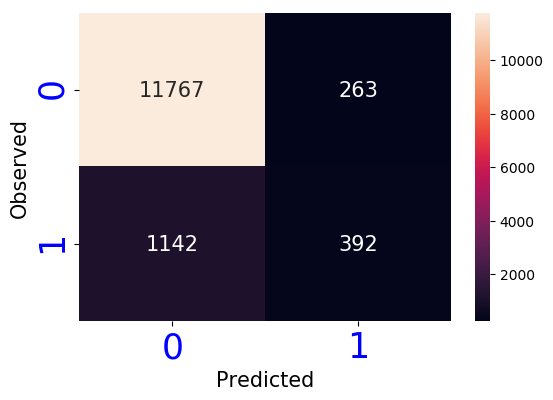

In [774]:
# confusion matrix

cm= confusion_matrix(y_test,y_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='.0f', annot_kws={"size":15})
plt.ylabel('Observed', size=15)
plt.xlabel('Predicted', size=15);
plt.xticks(size=25, color='blue');
plt.yticks(size=25, color='blue');

In [775]:
# Trainiing accuracy

logreg.score(X_train,y_train)

0.891111321768256

In [776]:
# Test accuracy

logreg.score(X_test,y_test)

0.8964169861397818

In [777]:
# print different performance metrices

print("Precision: {}\nRecall: {}\nAccuracy: {}\nF1 Score: {}\nROC AUC Score: {}".format(precision_score(y_test,y_predict),\
recall_score(y_test,y_predict), accuracy_score(y_test,y_predict), f1_score(y_test,y_predict), roc_auc_score(y_test,y_predict)))

Precision: 0.5984732824427481
Recall: 0.25554106910039115
Accuracy: 0.8964169861397818
F1 Score: 0.35815440840566465
ROC AUC Score: 0.6168395287314092


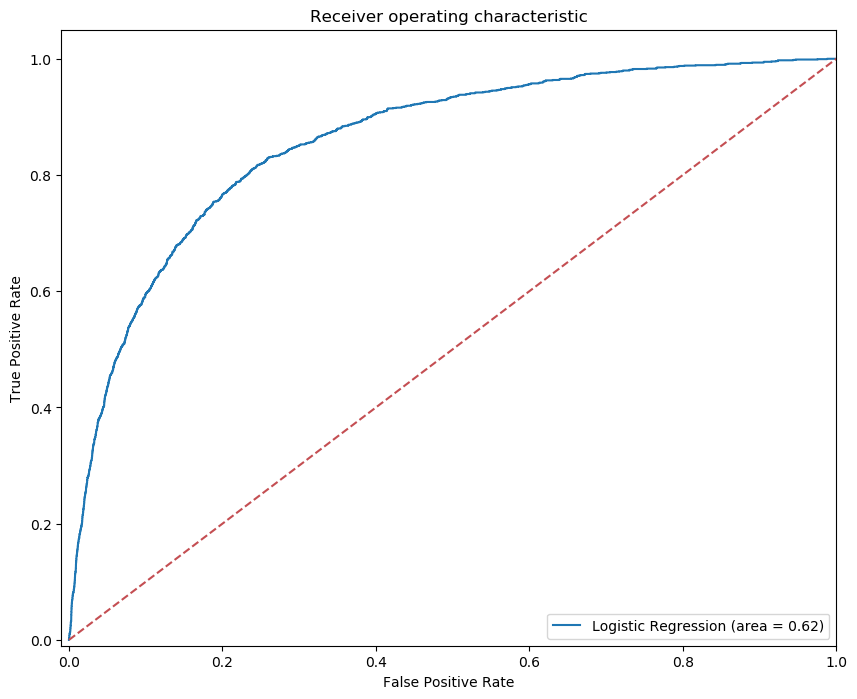

In [778]:
#AUC ROC curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1],pos_label=1)
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


<font color='green'>**Observation:**Logistic regression </font>

As bank wants to convert more people to personal loan TP should be high and FN should be low, so **recall** is important metric here.
In Logistics regression we see recall value is 0.26. So model is not performing as per business need.

In [779]:
# Model comparison DataFrame creation

dfModelComp = pd.DataFrame(columns=['model','precision','recall','accuracy','F1 score','roc auc score'])
dfModelComp

Empty DataFrame
Columns: [model, precision, recall, accuracy, F1 score, roc auc score]
Index: []

In [780]:
# insert logistics  performance data

model_perf = {'model':'Logistic regression', 'precision':precision_score(y_test,y_predict), 'recall':\
              recall_score(y_test,y_predict), 'accuracy':accuracy_score(y_test,y_predict), 'F1 score':\
              f1_score(y_test,y_predict), 'roc auc score':roc_auc_score(y_test,y_predict)}

dfModelComp = dfModelComp.append(model_perf, ignore_index=True)
dfModelComp

model  precision    recall  accuracy  F1 score  roc auc score
0  Logistic regression   0.598473  0.255541  0.896417  0.358154        0.61684

#### <font color='sky blue'> Decision Tree algorithm </font>

In [781]:
dTree = DecisionTreeClassifier(criterion = 'entropy', random_state=7)

In [782]:
dTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=7)

In [783]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.8787968150987909


<font color='green'>**Observation:**Decision Tree </font>

Compared to training data test score is much low as decision tree works on greedy algorithm. So this tree is highly overfitted. We need to restrict the growth of the tree by prunning.

In [784]:
# By doing trial method at max_depth = 7 Tree gives a balanced score between training and testing.

dTreeP = DecisionTreeClassifier(criterion = 'gini', max_depth =7 , random_state=7)
dTreeP.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=7)

In [785]:
# score from pruned tree

print(dTreeP.score(X_train, y_train))
print(dTreeP.score(X_test, y_test))

0.9106392391063924
0.9034945443821881


In [786]:
# predicting output of pruned tree

y_predict = dTreeP.predict(X_test)

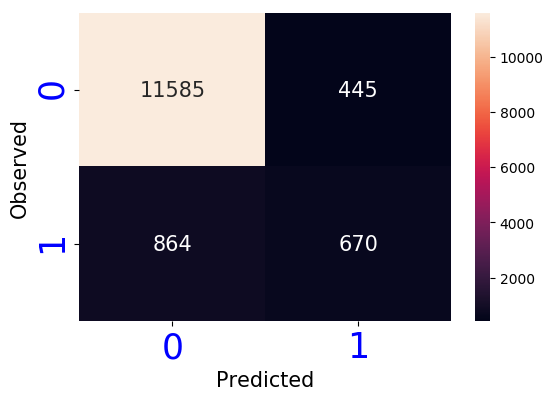

In [787]:
# confusion matrix of pruned tree

cm= confusion_matrix(y_test,y_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='.0f', annot_kws={"size":15})
plt.ylabel('Observed', size=15)
plt.xlabel('Predicted', size=15);
plt.xticks(size=25, color='blue');
plt.yticks(size=25, color='blue');

In [788]:
# performance metrices for pruned tree

print("Precision: {}\nRecall: {}\nAccuracy: {}\nF1 Score: {}\nROC AUC Score: {}".format(precision_score(y_test,y_predict),\
recall_score(y_test,y_predict), accuracy_score(y_test,y_predict), f1_score(y_test,y_predict), roc_auc_score(y_test,y_predict)))

Precision: 0.600896860986547
Recall: 0.4367666232073012
Accuracy: 0.9034945443821881
F1 Score: 0.5058512646281615
ROC AUC Score: 0.6998878835072251


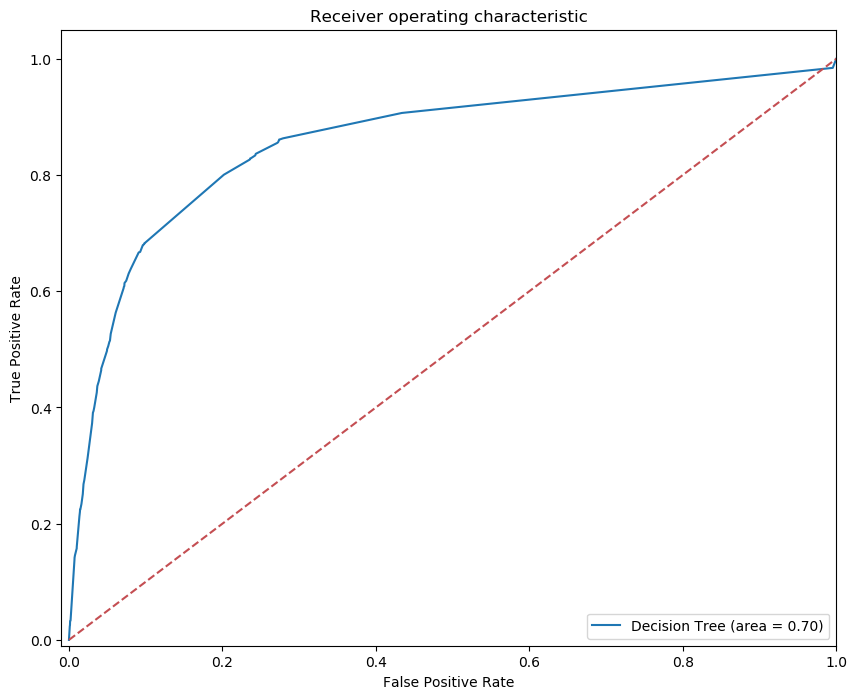

In [789]:
#AUC ROC curve

dTreeP_roc_auc = roc_auc_score(y_test, dTreeP.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dTreeP.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dTreeP_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [790]:
# grid search method

dTree = DecisionTreeClassifier(random_state = 7)
grid_values = {'criterion' : ['gini', 'entropy'],
               'splitter' : ['best', 'random'],
               'max_depth' : np.arange(5,9),
               'min_samples_leaf' : np.arange(5,25)
              }
dTreeGV = GridSearchCV(dTree, param_grid = grid_values)
dTreeGV.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeClassifier(random_state=7),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([5, 6, 7, 8]),
                         'min_samples_leaf': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24]),
                         'splitter': ['best', 'random']})

In [791]:
#Predict values based on Grid search parameters
y_predictGV= dTreeGV.predict(X_test)

# Grid Model Evaluation metrics 
print('Evaluation Score : ' + str(dTreeGV.score(X_test,y_test)))
print('Best Parameters : ' + str(dTreeGV.best_params_))

Evaluation Score : 0.9041580654674137
Best Parameters : {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 11, 'splitter': 'best'}


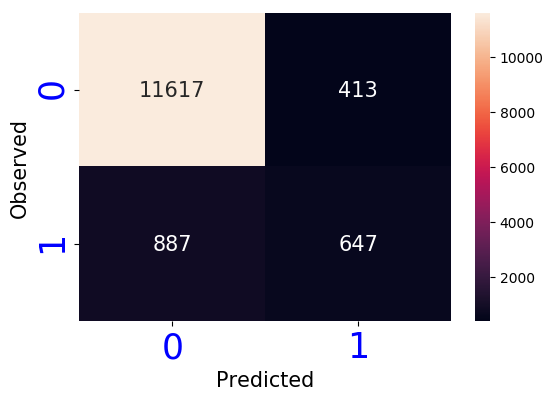

In [792]:
# confusion matrix from Grid search

cm= confusion_matrix(y_test,y_predictGV)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='.0f', annot_kws={"size":15})
plt.ylabel('Observed', size=15)
plt.xlabel('Predicted', size=15);
plt.xticks(size=25, color='blue');
plt.yticks(size=25, color='blue');

In [793]:
# performance metrices for Grid Serch tree

print("Precision: {}\nRecall: {}\nAccuracy: {}\nF1 Score: {}\nROC AUC Score: {}".format(precision_score(y_test,y_predictGV),\
recall_score(y_test,y_predictGV), accuracy_score(y_test,y_predictGV), f1_score(y_test,y_predictGV), \
                                                                                        roc_auc_score(y_test,y_predictGV)))

Precision: 0.6103773584905661
Recall: 0.4217731421121252
Accuracy: 0.9041580654674137
F1 Score: 0.4988434849653046
ROC AUC Score: 0.6937211512721889


<font color='green'>**Observation:**Decision Tree performance</font>

- After prunning decision tree performance somewhat improved compared to logistic regression
- Grid Serch method gives even further little bit of improvement in recall

In [794]:
# Insert pruned tree performance data

model_perf = {'model':'Decision Tree pruned', 'precision':precision_score(y_test,y_predict), 'recall':\
              recall_score(y_test,y_predict), 'accuracy':accuracy_score(y_test,y_predict), 'F1 score':\
              f1_score(y_test,y_predict), 'roc auc score':roc_auc_score(y_test,y_predict)}

dfModelComp = dfModelComp.append(model_perf, ignore_index=True)
dfModelComp

model  precision    recall  accuracy  F1 score  \
0   Logistic regression   0.598473  0.255541  0.896417  0.358154   
1  Decision Tree pruned   0.600897  0.436767  0.903495  0.505851   

   roc auc score  
0       0.616840  
1       0.699888

In [795]:
# Insert grid search performance data

model_perf = {'model':'Decision Tree Best Param', 'precision':precision_score(y_test,y_predictGV), 'recall':\
              recall_score(y_test,y_predictGV), 'accuracy':accuracy_score(y_test,y_predictGV), 'F1 score':\
              f1_score(y_test,y_predictGV), 'roc auc score':roc_auc_score(y_test,y_predictGV)}

dfModelComp = dfModelComp.append(model_perf, ignore_index=True)
dfModelComp

model  precision    recall  accuracy  F1 score  \
0       Logistic regression   0.598473  0.255541  0.896417  0.358154   
1      Decision Tree pruned   0.600897  0.436767  0.903495  0.505851   
2  Decision Tree Best Param   0.610377  0.421773  0.904158  0.498843   

   roc auc score  
0       0.616840  
1       0.699888  
2       0.693721

In [796]:
## Calculating feature importance used for interpretation

feat_importance = dTreeP.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(X_train.columns, dTreeP.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

0
duration             0.473695
poutcome_success     0.263138
housing              0.045638
pdays                0.042937
age                  0.030391
month_apr            0.028523
month_mar            0.023033
day                  0.020822
balance              0.013675
contact_unknown      0.012968
month_oct            0.008298
month_may            0.006907
campaign             0.005745
previous             0.004870
marital_married      0.003904
month_nov            0.002597
marital_divorced     0.001917
month_jun            0.001449
education_unknown    0.001380
job_blue-collar      0.001358
job_entrepreneur     0.001355
loan                 0.001014
job_technician       0.000930
job_housemaid        0.000925
education_secondary  0.000892
contact_cellular     0.000661
month_feb            0.000643
job_management       0.000335
month_jul            0.000000
month_dec            0.000000
poutcome_failure     0.000000
month_jan            0.000000
poutcome_other       0.000000
month_sep            0.000000
marital_single       0.000000
month_aug            0.000000
contact_telephone    0.000000
education_tertiary   0.000000
education_primary    0.000000
default              0.000000
job_unknown          0.000000
job_unemployed       0.000000
job_student          0.000000
job_services         0.000000
job_self-employed    0.000000
job_retired          0.000000
job_admin.           0.000000
poutcome_unknown     0.000000

### <font color='sky blue'> Ensemble models </font>

#### <font color='sky blue'>Bagging</font>

In [849]:
# Bagging

bgcl = BaggingClassifier(n_estimators=100 ,random_state=7)

bgcl = bgcl.fit(X_train, y_train)

In [850]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

0.9079180182836921


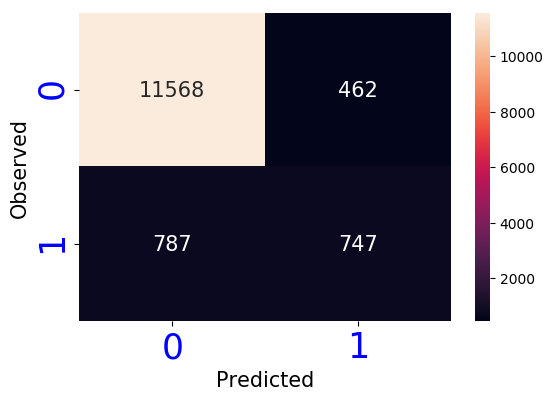

In [851]:
# confusion matrix from Bagging

cm= confusion_matrix(y_test,y_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='.0f', annot_kws={"size":15})
plt.ylabel('Observed', size=15)
plt.xlabel('Predicted', size=15);
plt.xticks(size=25, color='blue');
plt.yticks(size=25, color='blue');

In [832]:
# performance metrices for Bagging

print("Precision: {}\nRecall: {}\nAccuracy: {}\nF1 Score: {}\nROC AUC Score: {}".format(precision_score(y_test,y_predict),\
recall_score(y_test,y_predict), accuracy_score(y_test,y_predict), f1_score(y_test,y_predict), roc_auc_score(y_test,y_predict)))

Precision: 0.6178660049627791
Recall: 0.4869621903520209
Accuracy: 0.9079180182836921
F1 Score: 0.5446591323368575
ROC AUC Score: 0.7242791001635417


In [801]:
# performance metrices for Bagging

model_perf = {'model':'Bagging', 'precision':precision_score(y_test,y_predict), 'recall':\
              recall_score(y_test,y_predict), 'accuracy':accuracy_score(y_test,y_predict), 'F1 score':\
              f1_score(y_test,y_predict), 'roc auc score':roc_auc_score(y_test,y_predict)}

dfModelComp = dfModelComp.append(model_perf, ignore_index=True)
dfModelComp

model  precision    recall  accuracy  F1 score  \
0       Logistic regression   0.598473  0.255541  0.896417  0.358154   
1      Decision Tree pruned   0.600897  0.436767  0.903495  0.505851   
2  Decision Tree Best Param   0.610377  0.421773  0.904158  0.498843   
3                   Bagging   0.617866  0.486962  0.907918  0.544659   

   roc auc score  
0       0.616840  
1       0.699888  
2       0.693721  
3       0.724279

#### <font color='sky blue'>Adaptive boosting</font>

In [802]:
# Adaptive boosting

abcl = AdaBoostClassifier(n_estimators=250, random_state=7)

abcl = abcl.fit(X_train, y_train)

In [803]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

0.9051902093777646


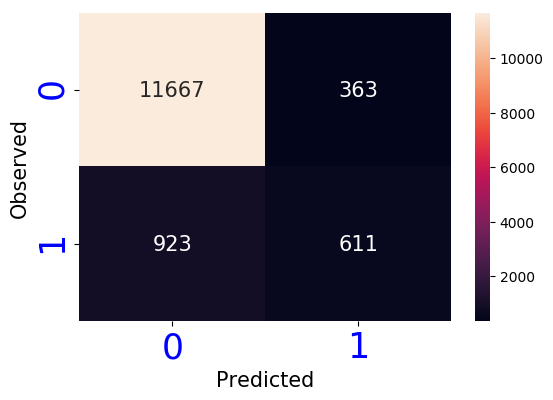

In [804]:
# confusion matrix for Adaptive boosting

cm= confusion_matrix(y_test,y_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='.0f', annot_kws={"size":15})
plt.ylabel('Observed', size=15)
plt.xlabel('Predicted', size=15);
plt.xticks(size=25, color='blue');
plt.yticks(size=25, color='blue');

In [805]:
# performance metrices for Adaptive boosting

print("Precision: {}\nRecall: {}\nAccuracy: {}\nF1 Score: {}\nROC AUC Score: {}".format(precision_score(y_test,y_predict),\
recall_score(y_test,y_predict), accuracy_score(y_test,y_predict), f1_score(y_test,y_predict), roc_auc_score(y_test,y_predict)))

Precision: 0.6273100616016427
Recall: 0.3983050847457627
Accuracy: 0.9051902093777646
F1 Score: 0.4872408293460925
ROC AUC Score: 0.6840652605773702


In [806]:
# Insert performance metrices for Adaptive boosting

model_perf = {'model':'Adaptive boosting', 'precision':precision_score(y_test,y_predict), 'recall':\
              recall_score(y_test,y_predict), 'accuracy':accuracy_score(y_test,y_predict), 'F1 score':\
              f1_score(y_test,y_predict), 'roc auc score':roc_auc_score(y_test,y_predict)}

dfModelComp = dfModelComp.append(model_perf, ignore_index=True)
dfModelComp

model  precision    recall  accuracy  F1 score  \
0       Logistic regression   0.598473  0.255541  0.896417  0.358154   
1      Decision Tree pruned   0.600897  0.436767  0.903495  0.505851   
2  Decision Tree Best Param   0.610377  0.421773  0.904158  0.498843   
3                   Bagging   0.617866  0.486962  0.907918  0.544659   
4         Adaptive boosting   0.627310  0.398305  0.905190  0.487241   

   roc auc score  
0       0.616840  
1       0.699888  
2       0.693721  
3       0.724279  
4       0.684065

#### <font color='sky blue'>Gradient Boosting</font>

In [862]:
# Gradient Boosting

gbcl = GradientBoostingClassifier(n_estimators = 250, random_state=7)
gbcl = gbcl.fit(X_train, y_train)

In [863]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))

0.912194043055146


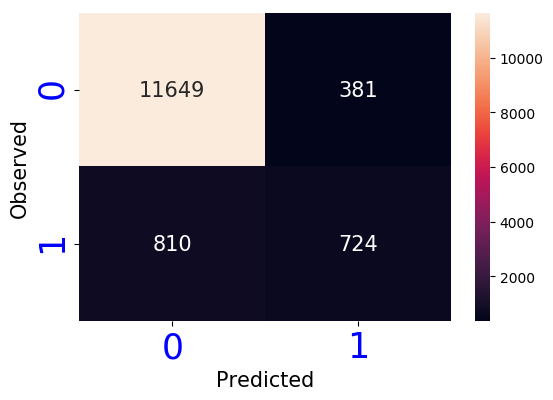

In [864]:
# confusion matrix for Gradient boosting

cm= confusion_matrix(y_test,y_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='.0f', annot_kws={"size":15})
plt.ylabel('Observed', size=15)
plt.xlabel('Predicted', size=15);
plt.xticks(size=25, color='blue');
plt.yticks(size=25, color='blue');

In [865]:
# performance metrices for Gradient boosting

print("Precision: {}\nRecall: {}\nAccuracy: {}\nF1 Score: {}\nROC AUC Score: {}".format(precision_score(y_test,y_predict),\
recall_score(y_test,y_predict), accuracy_score(y_test,y_predict), f1_score(y_test,y_predict), roc_auc_score(y_test,y_predict)))

Precision: 0.6552036199095023
Recall: 0.47196870925684486
Accuracy: 0.912194043055146
F1 Score: 0.5486926866237212
ROC AUC Score: 0.7201489431571007


In [811]:
# Insert performance metrices for Gradient boosting

model_perf = {'model':'Gradient boosting', 'precision':precision_score(y_test,y_predict), 'recall':\
              recall_score(y_test,y_predict), 'accuracy':accuracy_score(y_test,y_predict), 'F1 score':\
              f1_score(y_test,y_predict), 'roc auc score':roc_auc_score(y_test,y_predict)}

dfModelComp = dfModelComp.append(model_perf, ignore_index=True)
dfModelComp

model  precision    recall  accuracy  F1 score  \
0       Logistic regression   0.598473  0.255541  0.896417  0.358154   
1      Decision Tree pruned   0.600897  0.436767  0.903495  0.505851   
2  Decision Tree Best Param   0.610377  0.421773  0.904158  0.498843   
3                   Bagging   0.617866  0.486962  0.907918  0.544659   
4         Adaptive boosting   0.627310  0.398305  0.905190  0.487241   
5         Gradient boosting   0.655204  0.471969  0.912194  0.548693   

   roc auc score  
0       0.616840  
1       0.699888  
2       0.693721  
3       0.724279  
4       0.684065  
5       0.720149

#### <font color='sky blue'>Random Forest</font>

In [812]:
# Random Forest 

rfcl = RandomForestClassifier(n_estimators = 100, random_state=7,max_features=40)
rfcl = rfcl.fit(X_train, y_train)

In [813]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))

0.9071807726334414


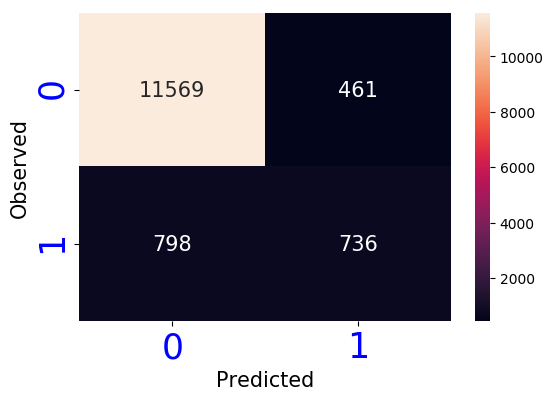

In [814]:
# confusion matrix for Random Forest 

cm= confusion_matrix(y_test,y_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='.0f', annot_kws={"size":15})
plt.ylabel('Observed', size=15)
plt.xlabel('Predicted', size=15);
plt.xticks(size=25, color='blue');
plt.yticks(size=25, color='blue');

In [815]:
# performance metrices for Random Forest

print("Precision: {}\nRecall: {}\nAccuracy: {}\nF1 Score: {}\nROC AUC Score: {}".format(precision_score(y_test,y_predict),\
recall_score(y_test,y_predict), accuracy_score(y_test,y_predict), f1_score(y_test,y_predict), roc_auc_score(y_test,y_predict)))

Precision: 0.6148705096073517
Recall: 0.47979139504563234
Accuracy: 0.9071807726334414
F1 Score: 0.5389967045038447
ROC AUC Score: 0.7207352652701146


In [816]:
# Insert performance metrices for Random Forest

model_perf = {'model':'Random Forest', 'precision':precision_score(y_test,y_predict), 'recall':\
              recall_score(y_test,y_predict), 'accuracy':accuracy_score(y_test,y_predict), 'F1 score':\
              f1_score(y_test,y_predict), 'roc auc score':roc_auc_score(y_test,y_predict)}

dfModelComp = dfModelComp.append(model_perf, ignore_index=True)
dfModelComp

model  precision    recall  accuracy  F1 score  \
0       Logistic regression   0.598473  0.255541  0.896417  0.358154   
1      Decision Tree pruned   0.600897  0.436767  0.903495  0.505851   
2  Decision Tree Best Param   0.610377  0.421773  0.904158  0.498843   
3                   Bagging   0.617866  0.486962  0.907918  0.544659   
4         Adaptive boosting   0.627310  0.398305  0.905190  0.487241   
5         Gradient boosting   0.655204  0.471969  0.912194  0.548693   
6             Random Forest   0.614871  0.479791  0.907181  0.538997   

   roc auc score  
0       0.616840  
1       0.699888  
2       0.693721  
3       0.724279  
4       0.684065  
5       0.720149  
6       0.720735

<font color='green'>**Observation:** </font>
- The above dataframe shows final performance comparison of different models.
- Baggaing gives the better result identifying potention customers. Recall is high for Bagging.
- Gradiant boosting works better in precision. hence wrong identification of potential customers is minimized.
- So if aggressive campaigning is our focus we will go with Bagging model, if we need to minimize campaign cost we will go with Gradient boosting model
- Random forest also works somewhat as a close competitor

## <center><font color = 'blue'>*Additional analysis*</font></center>

In [866]:
# Create Base Learners for Stacking
base_learners = [
                 ('model_1', BaggingClassifier(n_estimators=100, random_state=7)),
                 ('model_2', GradientBoostingClassifier(n_estimators = 250, random_state=7))
                ]

In [867]:
# Initialize Stacking Classifier

stackcl = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(random_state=7))

In [868]:
stackcl.fit(X_train, y_train)

StackingClassifier(estimators=[('model_1',
                                BaggingClassifier(n_estimators=100,
                                                  random_state=7)),
                               ('model_2',
                                GradientBoostingClassifier(n_estimators=250,
                                                           random_state=7))],
                   final_estimator=LogisticRegression(random_state=7))

In [869]:
y_predict = stackcl.predict(X_test)
print(stackcl.score(X_test, y_test))

0.9107932763196697


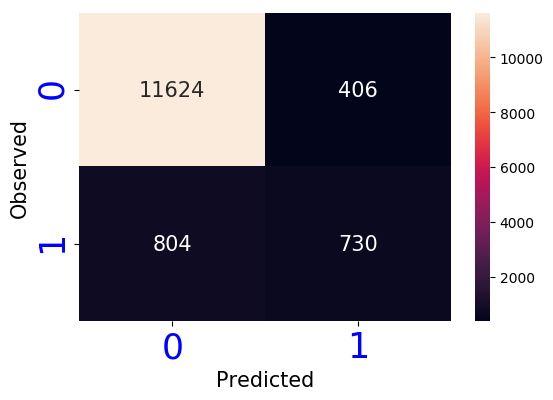

In [870]:
# confusion matrix for Stacking

cm= confusion_matrix(y_test,y_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='.0f', annot_kws={"size":15})
plt.ylabel('Observed', size=15)
plt.xlabel('Predicted', size=15);
plt.xticks(size=25, color='blue');
plt.yticks(size=25, color='blue');

In [871]:
# performance metrices for Stacking

print("Precision: {}\nRecall: {}\nAccuracy: {}\nF1 Score: {}\nROC AUC Score: {}".format(precision_score(y_test,y_predict),\
recall_score(y_test,y_predict), accuracy_score(y_test,y_predict), f1_score(y_test,y_predict), roc_auc_score(y_test,y_predict)))

Precision: 0.6426056338028169
Recall: 0.4758800521512386
Accuracy: 0.9107932763196697
F1 Score: 0.5468164794007491
ROC AUC Score: 0.7210655456101164


In [872]:
# performance metrices for Stacking

model_perf = {'model':'Stacking', 'precision':precision_score(y_test,y_predict), 'recall':\
              recall_score(y_test,y_predict), 'accuracy':accuracy_score(y_test,y_predict), 'F1 score':\
              f1_score(y_test,y_predict), 'roc auc score':roc_auc_score(y_test,y_predict)}

dfModelComp = dfModelComp.append(model_perf, ignore_index=True)
dfModelComp

model  precision    recall  accuracy  F1 score  \
0       Logistic regression   0.598473  0.255541  0.896417  0.358154   
1      Decision Tree pruned   0.600897  0.436767  0.903495  0.505851   
2  Decision Tree Best Param   0.610377  0.421773  0.904158  0.498843   
3                   Bagging   0.617866  0.486962  0.907918  0.544659   
4         Adaptive boosting   0.627310  0.398305  0.905190  0.487241   
5         Gradient boosting   0.655204  0.471969  0.912194  0.548693   
6             Random Forest   0.614871  0.479791  0.907181  0.538997   
7                  Stacking   0.642606  0.475880  0.910793  0.546816   

   roc auc score  
0       0.616840  
1       0.699888  
2       0.693721  
3       0.724279  
4       0.684065  
5       0.720149  
6       0.720735  
7       0.721066

<font color='green'>**Observation:** </font>
Using stacking mechanism with best models also provides similar performance.
Considering the resource and time consumption of stacking it is not worth.